In [311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string



In [312]:
df = pd.read_csv("review.csv")

In [313]:
df.head(5)

,Review,Lable
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0    Review  1000 non-null   object
 1   Lable    1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [315]:
df.shape

(1000, 2)

In [316]:
#Checking Duplicated Values 

In [317]:
df.duplicated().sum()

6

In [318]:
#removing Duplicated Values

In [319]:
df = df.drop_duplicates()

In [320]:
df.duplicated().sum()

0

In [321]:
#Checking Null Values

In [322]:
df.isnull().any().sum()

0

In [323]:
# Checking the data is imbalanced or not

In [324]:
df.groupby("Lable").count()

,Review
Lable,
0,496
1,498


<AxesSubplot:xlabel='Lable'>

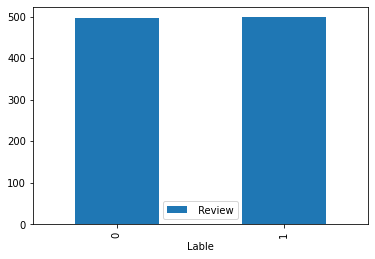

In [325]:
df.groupby("Lable").count().plot.bar()

In [326]:
# The data is balanced

In [327]:
df.rename(columns = {" Review":"Review"},inplace = True)

In [328]:
df.head(1)

,Review,Lable
0,Wow... Loved this place.,1


In [329]:
# NLTK Preprocessing

In [330]:
#removiewing Stopwords

In [331]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.add('http')
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
df['Review'] = df['Review'].apply(lambda x: remove_stopwords(x))

In [332]:
df["Review"]

0                                    Wow... Loved place.
1                                            Crust good.
2                               Not tasty texture nasty.
3      Stopped late May bank holiday Rick Steve recom...
4                       The selection menu great prices.
                             ...                        
995                 I think food flavor texture lacking.
996                             Appetite instantly gone.
997                   Overall I impressed would go back.
998    The whole experience underwhelming, I think we...
999    Then, I wasted enough life there, poured salt ...
Name: Review, Length: 994, dtype: object

In [333]:
# Stemming

In [334]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])
df["Review"] = df["Review"].apply(lambda x: stem_words(x))


In [335]:
df["Review"]

0                                     wow... love place.
1                                            crust good.
2                                not tasti textur nasty.
3      stop late may bank holiday rick steve recommen...
4                          the select menu great prices.
                             ...                        
995                  i think food flavor textur lacking.
996                              appetit instantli gone.
997                      overal i impress would go back.
998    the whole experi underwhelming, i think we'll ...
999    then, i wast enough life there, pour salt woun...
Name: Review, Length: 994, dtype: object

In [336]:
# Removing words with digits

In [337]:
df['Review'] = df['Review'].apply(lambda x: re.sub('W*dw*','',x))

In [338]:
# Lemitization

In [339]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
df["Review"] = df["Review"].apply(lambda text: lemmatize_words(text))

In [340]:
df.head(5)

,Review,Lable
0,wow... love place.,1
1,crust goo.,0
2,not tasti textur nasty.,0
3,stop late may bank holiay rick steve recommen ...,1
4,the select menu great prices.,1


In [341]:
# Removing Punctuations

In [342]:
punctuations = !#$%&'()*+,-./:;<=>?@[\]^_`{|}~'
df['Review'] = df['Review'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))

In [343]:
df.head(5)

,Review,Lable
0,wow love place,1
1,crust goo,0
2,not tasti textur nasty,0
3,stop late may bank holiay rick steve recommen ...,1
4,the select menu great prices,1


In [344]:
# Converting REview into BOW


In [345]:
corpus = []
for i in df["Review"]:
    corpus.append(i)

In [346]:
corpus

['wow love place',
 'crust goo',
 'not tasti textur nasty',
 'stop late may bank holiay rick steve recommen love it',
 'the select menu great prices',
 'now i get angri i want amn pho',
 'honeslti tast that fresh',
 'the potato like rubber coul tell mae ahea time kept warmer',
 'the fri great too',
 'a great touch',
 'servic prompt',
 'woul go back',
 'the cashier care ever i say still en wayyy overprice',
 'i tri cape co ravoli chicken cranberrymmmm',
 'i isgust i pretti sure human hair',
 'i shock sign inic cash only',
 'highli recommene',
 'waitress littl slow service',
 'thi place worth time let alon vegas',
 'like all',
 'the burritto blah',
 'the foo amazing',
 'servic also cute',
 'i coul care less the interior beautiful',
 'so performe',
 'that rightth re velvet cakeohhh stuff goo',
 'name',
 'thi hole wall great mexican street tacos frienli staff',
 'took hour get foo 4 tabl restaur foo luke warm our sever run aroun like total overwhelme',
 'the worst salmon sashimi',
 'also c

In [347]:
from sklearn.feature_extraction.text import CountVectorizer

In [348]:
cv = CountVectorizer()
BOW = cv.fit_transform(corpus).toarray()

In [349]:
BOW.shape

(994, 1878)

In [350]:
y= df["Lable"]

In [351]:
x = BOW

In [363]:
# splitting values into 80:20

In [365]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

In [366]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(596, 1878)
(596,)
(398, 1878)
(398,)


In [367]:
# we have large d so we start with logestic regression

In [368]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l2', random_state=0)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

In [369]:
# classification report

In [370]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       197
           1       0.76      0.78      0.77       201

    accuracy                           0.76       398
   macro avg       0.76      0.76      0.76       398
weighted avg       0.76      0.76      0.76       398



In [371]:
# we got accuracy 76%

In [372]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[147,  50],
       [ 45, 156]], dtype=int64)

In [373]:
# Trying Decision tree

In [374]:
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
model_dt.fit(x_train,y_train)
dty_pred=model_dt.predict(x_test)

In [382]:
confusion_matrix(y_test, dty_pred)


array([[188,   9],
       [120,  81]], dtype=int64)

In [383]:
print("Accuracy Score for Decision tree is" ,Decisiontree)

Accuracy Score for Decision tree is 0.6488294314381271


In [376]:
# we get less Accuracy in decision tree as expected

In [384]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnby_pred=model_dt.predict(x_test)

In [385]:
# Trying Naive bays

In [386]:
print(classification_report(y_test, gnby_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.61      0.95      0.74       197
           1       0.90      0.40      0.56       201

    accuracy                           0.68       398
   macro avg       0.76      0.68      0.65       398
weighted avg       0.76      0.68      0.65       398



In [387]:
#GNB also have less accuracy

In [388]:
# Trying KNN

In [389]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train,y_train)
neighy_pred=model_dt.predict(x_test)

In [393]:
print(classification_report(neighy_pred, y_test, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.95      0.61      0.74       308
           1       0.40      0.90      0.56        90

    accuracy                           0.68       398
   macro avg       0.68      0.76      0.65       398
weighted avg       0.83      0.68      0.70       398



In [394]:
from sklearn.metrics import accuracy_score
logrstic = accuracy_score(y_test, y_pred)
Decisiontree = accuracy_score(y_test, dty_pred)
Naivebays = accuracy_score(y_test, gnby_pred)
KNN = accuracy_score(y_test, neighy_pred)
print("Accuracy Score for logrstic Regression is" ,logrstic)
print("Accuracy Score for Decision tree is" ,Decisiontree)
print("Accuracy Score for Naive bays is" ,Naivebays)
print("Accuracy Score for KNN is" ,KNN)


Accuracy Score for logrstic Regression is 0.7613065326633166
Accuracy Score for Decision tree is 0.6758793969849246
Accuracy Score for Naive bays is 0.6758793969849246
Accuracy Score for KNN is 0.6758793969849246


In [395]:
# only logestic regression has high accuracy so we use hyperparameter tunning

In [396]:
# trying SGD classifier

In [397]:
from sklearn.metrics import log_loss
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

alpha = [10 ** x for x in range(-5, 1)]
cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(x_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(x_train, y_train)
    predict_y = sig_clf.predict_proba(x_test)
    cv_log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


For values of alpha =  1e-05 The log loss is: 0.5192126621404968
For values of alpha =  0.0001 The log loss is: 0.5133806294540157
For values of alpha =  0.001 The log loss is: 0.49032290396821215
For values of alpha =  0.01 The log loss is: 0.5062883452562902
For values of alpha =  0.1 The log loss is: 0.5430719782558373
For values of alpha =  1 The log loss is: 0.572958351775082


In [398]:
# Find best alpha who min. loss

In [399]:
best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(x_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train, y_train)
predict_y = sig_clf.predict_proba(x_test)

In [289]:
log_loss(y_test, predict_y)

0.4958128002836017

In [400]:
# The best Value for alpha is 0.001

In [401]:
# using best alpha with logestic regression

In [402]:
clf = SGDClassifier(alpha= 0.001, penalty='l2', loss='log', random_state=0)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

In [403]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       197
           1       0.77      0.77      0.77       201

    accuracy                           0.77       398
   macro avg       0.77      0.77      0.77       398
weighted avg       0.77      0.77      0.77       398



In [404]:
# Accuracy increased by 0.1%

In [405]:
# we can obtain high accuracy by changing BOW to W2V.tfidfW2V